# Some fun scripts involving XOM and JPM stocks
**Owner**: Thomas De Massari    
**Linkedin**: https://www.linkedin.com/in/thomasdemassari/  
**GitHub**: https://github.com/thomasdemassari/     
**Course**: Data Science Summer School 2023, University of Trento  

I wrote these short scripts to apply the fundamental concepts from the Data Science Summer School 2023 course.

## Libraries

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import yfinance as yf

## Data upload

In [228]:
xom = yf.download("XOM", start = "2012-01-01", end = "2022-12-31")
jpm = yf.download("JPM", start = "2012-01-01", end = "2022-12-31")
sp500 = yf.download("^SPX", start = "2012-01-01", end = "2022-12-31")

# Needed for get Date (without hours)
xom.reset_index(inplace=True)
jpm.reset_index(inplace=True)
sp500.reset_index(inplace=True)

xom['Date'] = xom['Date'].dt.date
jpm['Date'] = jpm['Date'].dt.date
sp500['Date'] = sp500['Date'].dt.date

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Graphical analysis

### XOM

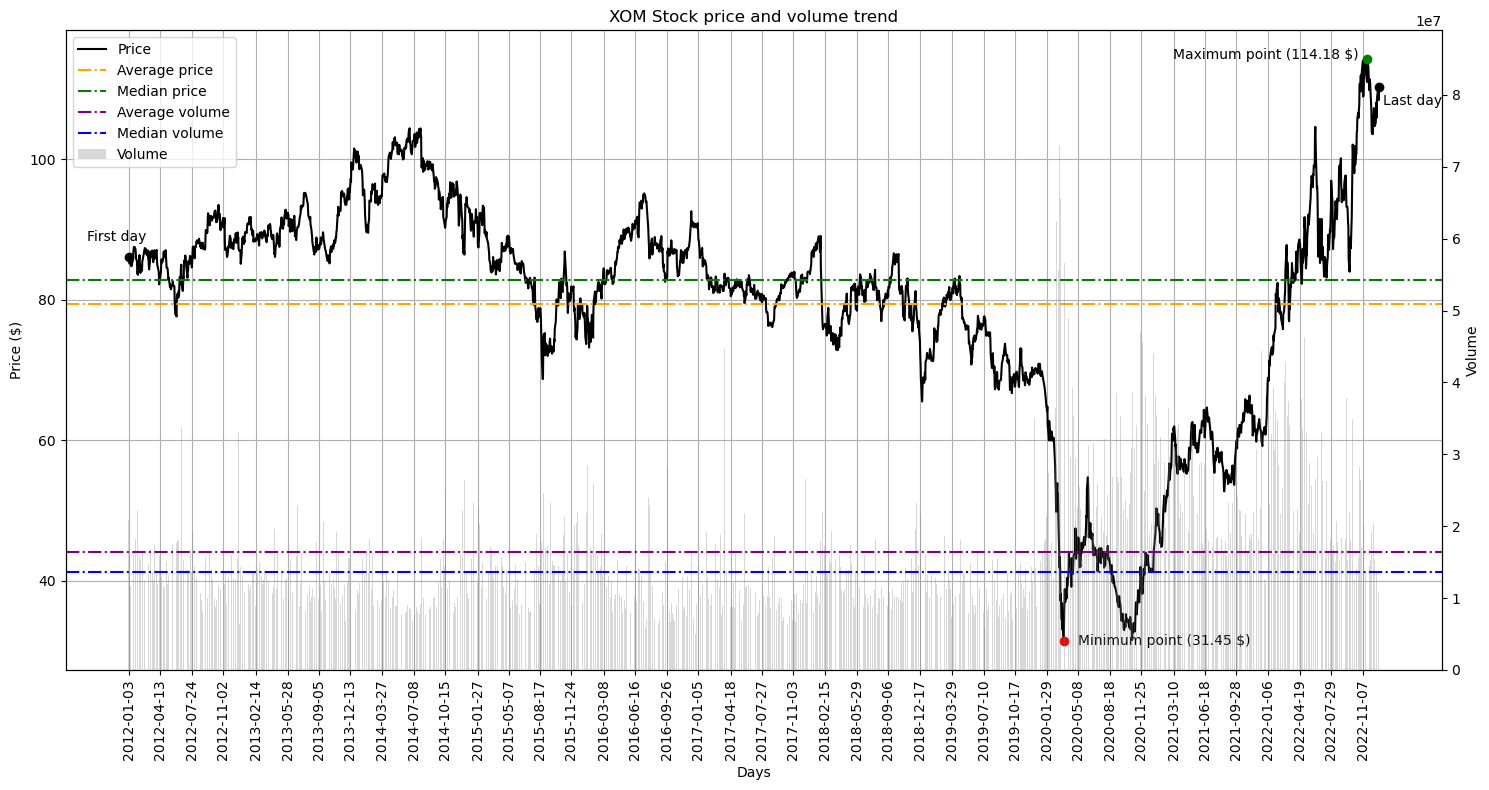

In [229]:
date = xom["Date"]
price = xom["Close"]
volume = xom["Volume"]

# PRICE
fig, ax1 = plt.subplots(figsize = (15, 8))
ax1.plot(date, price, color = "black", label = "Price")
ax1.set_xlabel("Days")
ax1.set_ylabel("Price ($)")
ax1.set_xticks(date[::70])
ax1.set_xticklabels(date[::70], rotation=90)

# AVG and Median
price_avg = price.mean()
price_median = price.median()
ax1.axhline(y = price_avg, color = "orange", linestyle = "-.", label = "Average price")
ax1.axhline(y = price_median, color = "green", linestyle = "-.", label = "Median price")

# MAX and MIN price
ax1.plot(date[price.idxmax()], price.max(), "go")
ax1.annotate(f"Maximum point ({round(price.max(), 2)} $)", (date[price.idxmax()], price.max()), textcoords = "offset points", xytext = (-6, -2), ha = "right", va = "bottom")

ax1.plot(date[price.idxmin()], price.min(), "ro")
ax1.annotate(f"Minimum point ({round(price.min(), 2)} $)", (date[price.idxmin()], price.min()), textcoords = "offset points", xytext = (10, -5), ha = 'left', va = "bottom")

# Fist and last day
x_first = date[0]
y_first = price[0]
ax1.plot(x_first, y_first, "ko")
ax1.annotate("First day", (x_first, y_first), textcoords = "offset points", xytext = (-30, +20), va = "top")

x_last = date[len(date)-1]
y_last = price[len(price)-1]
ax1.plot(x_last, y_last, "ko")
ax1.annotate("Last day", (x_last, y_last), textcoords = "offset points", xytext = (+3, -5), va = "top")

ax1.grid(True)

# VOLUME
ax2 = ax1.twinx()
ax2.bar(date, volume, color = "grey", alpha = 0.3, label = "Volume")
ax2.set_ylabel("Volume", color = "black")
ax2.tick_params(axis = "y", labelcolor = "black")

# AVG e Median
volume_average = volume.mean()
volume_median = volume.median()
ax2.axhline(y = volume_average, color = "purple", linestyle = "-.", label = "Average volume")
ax2.axhline(y = volume_median, color = "blue", linestyle = "-.", label = "Median volume")

fig.legend(loc = "upper left", bbox_to_anchor = (0,1), bbox_transform = ax1.transAxes)

plt.title("XOM Stock price and volume trend")
plt.tight_layout()
plt.show()

### JPM

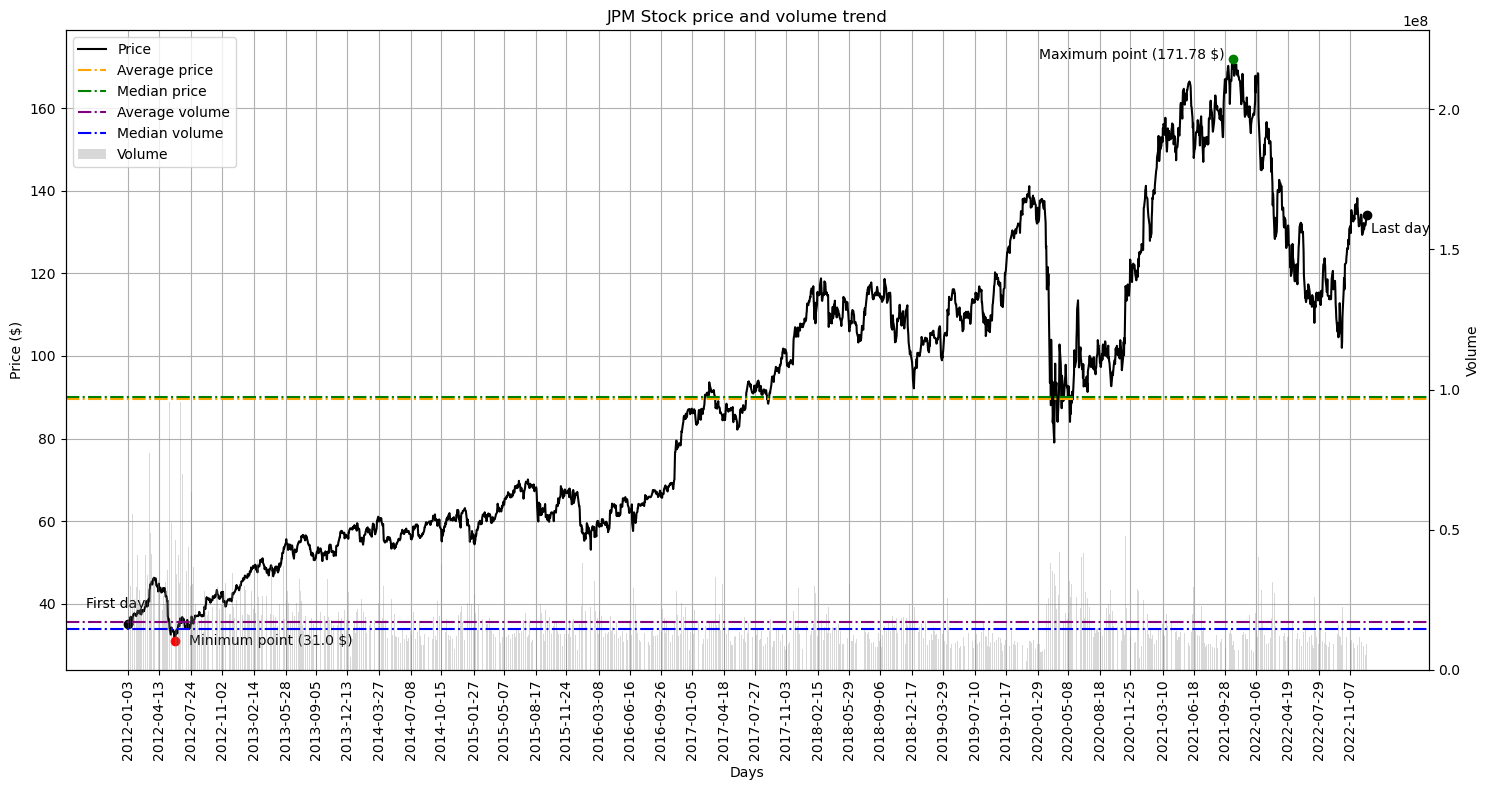

In [225]:
date = jpm["Date"]
price = jpm["Close"]
volume = jpm["Volume"]

# PRICE
fig, ax1 = plt.subplots(figsize = (15, 8))
ax1.plot(date, price, color = "black", label = "Price")
ax1.set_xlabel("Days")
ax1.set_ylabel("Price ($)")
ax1.set_xticks(date[::70])
ax1.set_xticklabels(date[::70], rotation=90)

# AVG and Median
price_avg = price.mean()
price_median = price.median()
ax1.axhline(y = price_avg, color = "orange", linestyle = "-.", label = "Average price")
ax1.axhline(y = price_median, color = "green", linestyle = "-.", label = "Median price")

# MAX and MIN price
ax1.plot(date[price.idxmax()], price.max(), "go")
ax1.annotate(f"Maximum point ({round(price.max(), 2)} $)", (date[price.idxmax()], price.max()), textcoords = "offset points", xytext = (-6, -2), ha = "right", va = "bottom")

ax1.plot(date[price.idxmin()], price.min(), "ro")
ax1.annotate(f"Minimum point ({round(price.min(), 2)} $)", (date[price.idxmin()], price.min()), textcoords = "offset points", xytext = (10, -5), ha = 'left', va = "bottom")

# Fist and last day
x_first = date[0]
y_first = price[0]
ax1.plot(x_first, y_first, "ko")
ax1.annotate("First day", (x_first, y_first), textcoords = "offset points", xytext = (-30, +20), va = "top")

x_last = date[len(date)-1]
y_last = price[len(price)-1]
ax1.plot(x_last, y_last, "ko")
ax1.annotate("Last day", (x_last, y_last), textcoords = "offset points", xytext = (+3, -5), va = "top")

ax1.grid(True)

# VOLUME
ax2 = ax1.twinx()
ax2.bar(date, volume, color = "grey", alpha = 0.3, label = "Volume")
ax2.set_ylabel("Volume", color = "black")
ax2.tick_params(axis = "y", labelcolor = "black")

# AVG e Median
volume_average = volume.mean()
volume_median = volume.median()
ax2.axhline(y = volume_average, color = "purple", linestyle = "-.", label = "Average volume")
ax2.axhline(y = volume_median, color = "blue", linestyle = "-.", label = "Median volume")


fig.legend(loc = "upper left", bbox_to_anchor = (0,1), bbox_transform = ax1.transAxes)

plt.title("JPM Stock price and volume trend")
plt.tight_layout()
plt.show()

### SP500

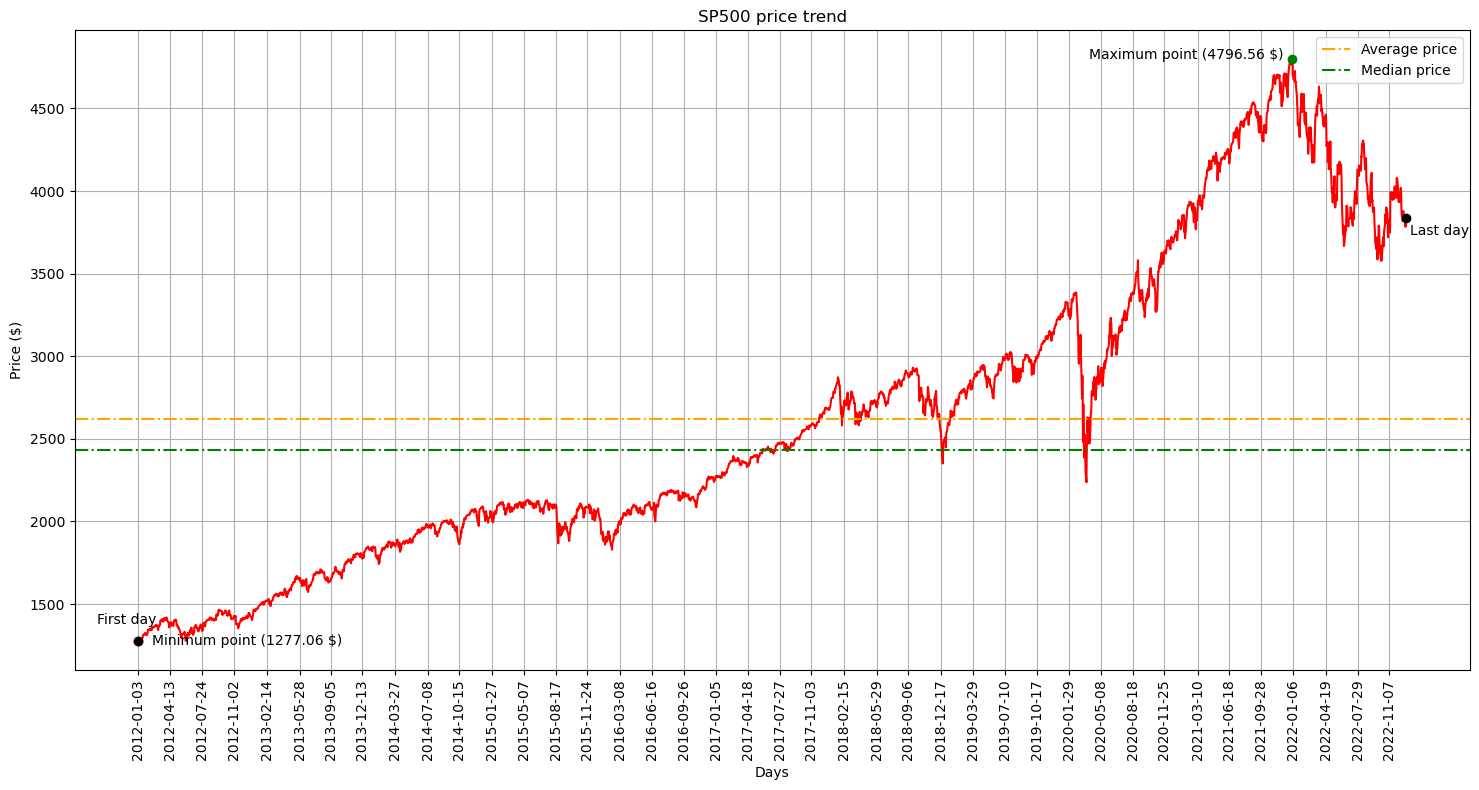

In [226]:
date = sp500["Date"]
price = sp500["Close"]

plt.figure(figsize=(15, 8)) 
plt.plot(date, price, color = "red")

plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.xticks(date[::70], rotation=90)

# AVG and Median
price_avg = price.mean()
price_median = price.median()
plt.axhline(y = price_avg, color = "orange", linestyle = "-.", label = "Average price")
plt.axhline(y = price_median, color = "green", linestyle = "-.", label = "Median price")

# MAX and MIN price
plt.plot(date[price.idxmax()], price.max(), "go")
plt.annotate(f"Maximum point ({round(price.max(), 2)} $)", (date[price.idxmax()], price.max()), textcoords = "offset points", xytext = (-6, -2), ha = "right", va = "bottom")

plt.plot(date[price.idxmin()], price.min(), "ro")
plt.annotate(f"Minimum point ({round(price.min(), 2)} $)", (date[price.idxmin()], price.min()), textcoords = "offset points", xytext = (10, -5), ha = 'left', va = "bottom")

# Fist and last day
x_first = date[0]
y_first = price[0]
plt.plot(x_first, y_first, "ko")
plt.annotate("First day", (x_first, y_first), textcoords = "offset points", xytext = (-30, +20), va = "top")

x_last = date[len(date)-1]
y_last = price[len(price)-1]
plt.plot(x_last, y_last, "ko")
plt.annotate("Last day", (x_last, y_last), textcoords = "offset points", xytext = (+3, -5), va = "top")

plt.grid(True)

plt.title("SP500 price trend")
plt.legend()
plt.tight_layout()
plt.show()

## Markowitz (1952) - Portfolio Selection

### Function
The function takes as input:
- a tuple containing, for each position, a Pandas DataFrame that includes stock prices;
- a tuple containing the column numbers where the stock prices (not returns) are located.

It returns a dictionary with two Pandas DataFrame: one with returns, standard deviation, and portfolio weights ("Result") and the other one with correlations ("Correlations"). If the parameter 'chart' is set to True, it also plots the chart; by default, it is set to False.

In [217]:
def PortfolioSelection(securities, cols_price, chart = False):
    try:
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        import math
        import random
        from datetime import datetime

        daily_returns = list()                                          # Where I will save daily returns
        returns = list()                                                # Where I will save average returns
        sds = list()                                                    # Where I will save standard deviations of daily returns

        for i in range(len(securities)):
            prices = securities[i].iloc[:, cols_price[i]]               # Stock prices of security i
            daily_return = (prices.pct_change()).iloc[1:]               # Daily return of security i
            daily_returns.append(daily_return)                          
            returns.append(np.mean(daily_return))                       # Average return 

            sd = np.std(daily_return)                                   # Standard deviation of security i
            sds.append(sd)                                             


        port_returns = list()                                           # Portfolio returns
        port_sds = list()                                               # Portfolio standard deviations
        saved_weigths = list()                                          # Weights of securities
        
        # Temporary variables
        reps = 0 
        portfolio_returns_tmp = 0
        portfolio_sds_tmp = 0

        correlations = np.zeros((len(securities), len(securities)))

        while reps <= 1000:
            weights = list()                                            # Weights of portfolio j 
            list_tmp = list()                                           # Where I will save temporarily weights in each cycle 

            # Randomly choose weights (0 <= w <= 1). The sum must be 1.
            for j in range(len(securities) - 1):
                # np.random.seed(226091)                                # (226091 is my Student ID number at University of Trento)
                n_random = random.uniform(0, 1)                         
                weights.append(n_random)
                list_tmp.append(round(n_random*100, 3))          

            last_weights = 1 - sum(weights)
            weights.append(last_weights)
            list_tmp.append(round(last_weights*100, 3))
            saved_weigths.append(list_tmp)

            # Portfolio returns and standard deviations
            for i in range(len(securities)):       
                # Portfolio returns                        
                portfolio_returns_tmp = portfolio_returns_tmp + weights[i] * returns[i] 

                # Portfolio standard deviations
                for j in range(len(securities)):
                    cor = float(np.corrcoef(daily_returns[i], daily_returns[j])[0, 1])
                    tmp = weights[i] * weights[j] * sds[i] * sds[j] * cor
                    portfolio_sds_tmp = portfolio_sds_tmp + tmp 

                    correlations[i][j] = cor
                    correlations[j][i] = cor
                
                correlations[i][i] = 1

            port_sds.append(math.sqrt(portfolio_sds_tmp) * 100)
            port_returns.append(portfolio_returns_tmp * 100)

            portfolio_returns_tmp = 0
            portfolio_sds_tmp = 0

            reps = reps + 1

        result = pd.DataFrame({"Returns (%)": port_returns, "Standard Deviation (%)": port_sds, "Weights (%)": saved_weigths})
        result = result.sort_values(by="Standard Deviation (%)")
        result = result.reset_index()

        # Chart
        if chart == True:
            date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            min_sd = np.argmin(port_sds)
            index_min_r =  port_returns[min_sd]

            facecolors_list = list()
            for z in range(len(port_returns)):
                if(port_returns[z] >= index_min_r):
                    facecolors_list.append("black")
                else:
                    facecolors_list.append("none")

            plt.figure(figsize=(15, 6))
            plt.scatter(port_sds, port_returns, color = "black", facecolors = facecolors_list, linewidths=0.5)

            plt.title(f"Efficient frontier (printed on: {date})")
            plt.xlabel("Standard deviation (%)")
            plt.ylabel("Returns (%)")

            plt.axhline(y = round(index_min_r, 4), color = "k", linestyle = "--")

            plt.show()


        # Correlations between securities
        titles_names = [f"Security {index+1}" for index in range(len(securities))]
        correlations = pd.DataFrame(correlations, index=titles_names, columns=titles_names)
        
        # Result 
        result_dict = {
            "Result": result,
            'Correlations': correlations
        }

        return result_dict
    
    except:
        raise Exception("Something went wrong.")

### Implementation

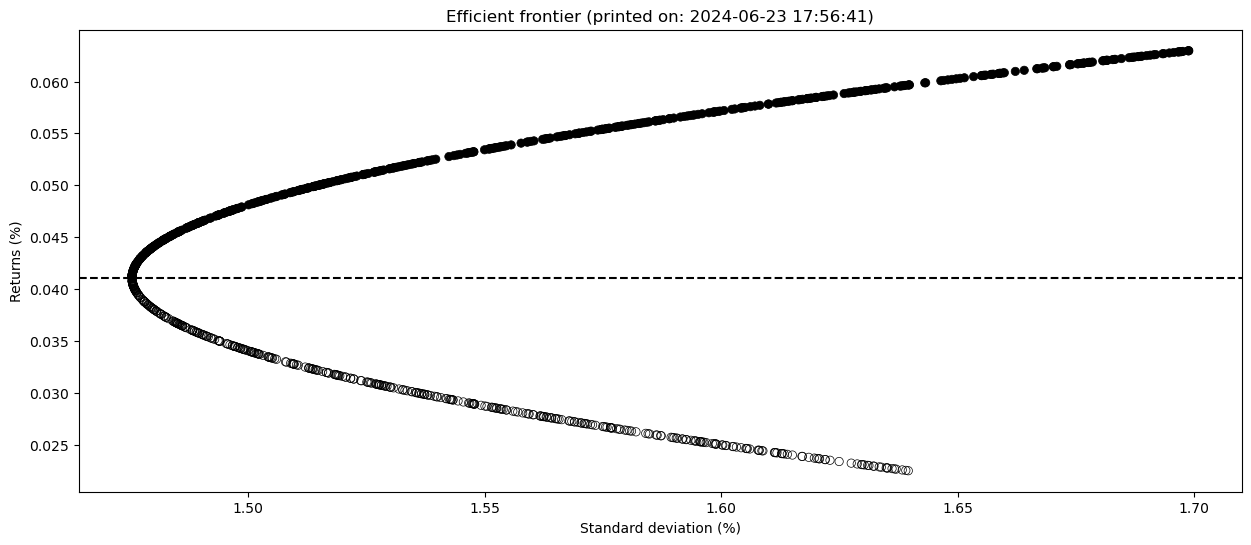

      index  Returns (%)  Standard Deviation (%)       Weights (%)
0       767     0.041097                1.475430  [54.005, 45.995]
1       598     0.040994                1.475432  [54.259, 45.741]
2       364     0.041152                1.475433    [53.87, 46.13]
3       305     0.041230                1.475442  [53.678, 46.322]
4       806     0.041248                1.475445  [53.633, 46.367]
...     ...          ...                     ...               ...
996     870     0.062886                1.697272   [0.269, 99.731]
997     491     0.062902                1.697592   [0.227, 99.773]
998     432     0.062963                1.698740   [0.078, 99.922]
999       4     0.062964                1.698760   [0.076, 99.924]
1000    354     0.062968                1.698847   [0.064, 99.936]

[1001 rows x 4 columns]
            Security 1  Security 2
Security 1    1.000000    0.564374
Security 2    0.564374    1.000000


In [218]:
secs = (xom, jpm)
ncols = (4, 4)

xom_jpm = PortfolioSelection(secs, ncols, chart = True)
print(xom_jpm["Result"])
print(xom_jpm["Correlations"])

## Sharpe (1963) - A Simplified Model for Portfolio Analysis

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     1586.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.49e-274
Time:                        17:56:46   Log-Likelihood:                 8074.6
No. Observations:                2767   AIC:                        -1.615e+04
Df Residuals:                    2765   BIC:                        -1.613e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.775      0.4

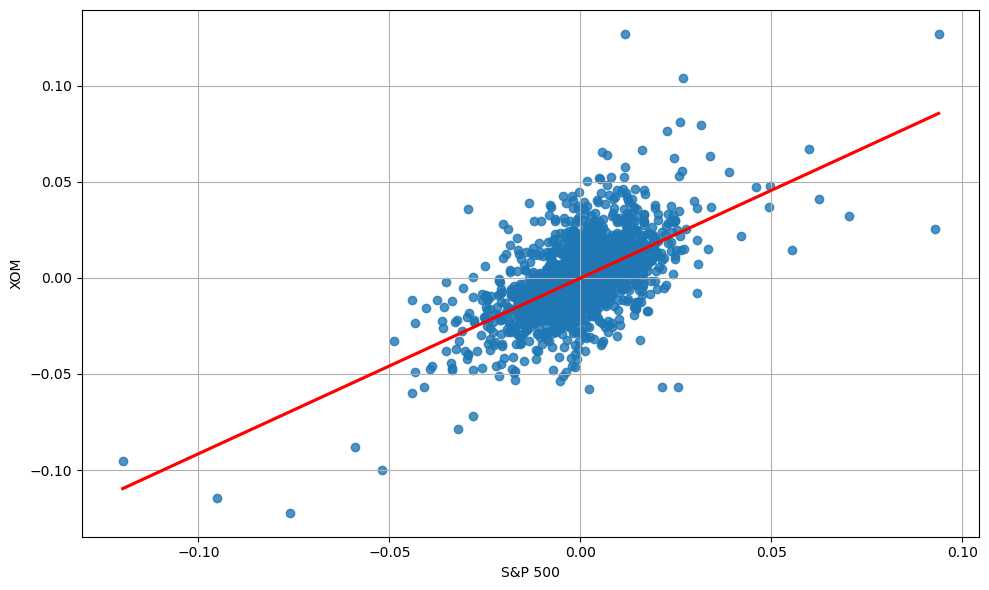

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3314.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:56:46   Log-Likelihood:                 8439.1
No. Observations:                2767   AIC:                        -1.687e+04
Df Residuals:                    2765   BIC:                        -1.686e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.463      0.6

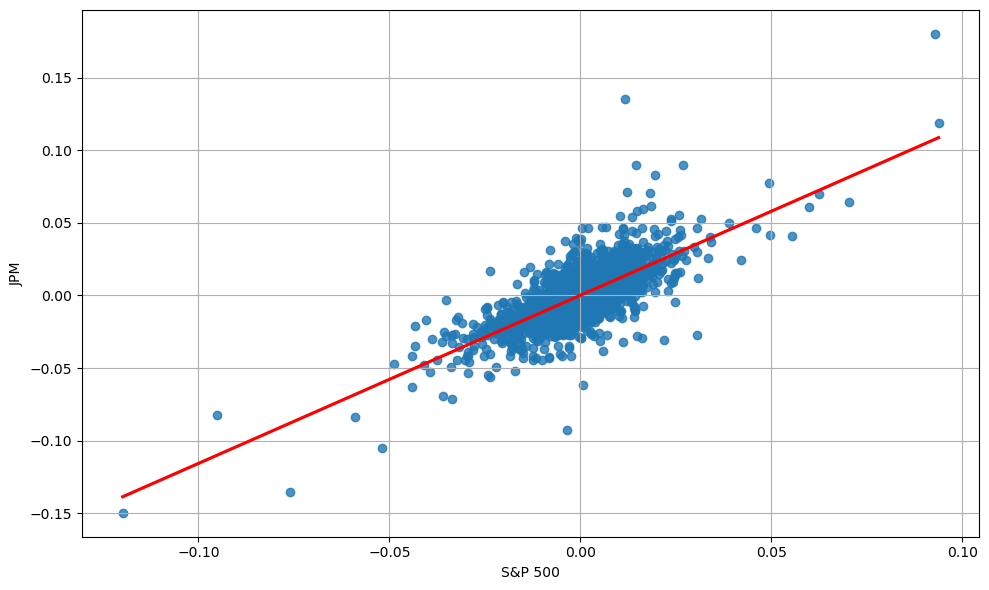

In [219]:
returns_jpm = (jpm["Close"]).pct_change().iloc[1:] 
returns_xom = (xom["Close"]).pct_change().iloc[1:] 
returns_sp500 = (sp500["Close"]).pct_change().iloc[1:] 

returns_sp500_cost = sm.add_constant(returns_sp500)

# XOM
sharpe63_xom = sm.OLS(returns_xom, returns_sp500_cost)
print((sharpe63_xom.fit()).summary())
# Chart 
plt.figure(figsize = (10, 6))
sns.regplot(x = returns_sp500, y = returns_xom, ci = None, line_kws = {"color": "red"})
plt.xlabel("S&P 500")
plt.ylabel("XOM")
plt.grid(True)
plt.tight_layout()
plt.show()

# JPM
sharpe63_jpm = sm.OLS(returns_jpm, returns_sp500_cost)
print((sharpe63_jpm.fit()).summary())
# Chart 
plt.figure(figsize = (10, 6))
sns.regplot(x = returns_sp500, y = returns_jpm, ci = None, line_kws = {"color": "red"})
plt.xlabel("S&P 500")
plt.ylabel("JPM")
plt.grid(True)
plt.tight_layout()
plt.show()